In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import chi2_contingency, ttest_ind

print("LODING DATA.....")

#load data from CSV file
df = pd.read_csv("C:/Users/pooja kumari/Downloads/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f"Original data shape: {df.shape}")

df_clean = df.drop(columns=['customerID'])
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'],errors='coerce').fillna(0)

print(f"Cleaned data shape: {df_clean.shape}")
print(f"Total Rows: {len(df_clean)}")

print("\n---Data Summary---")
print(df_clean.info())
print("=" * 60)
print("Data Cleaning Completed Successfully!")



LODING DATA.....
Original data shape: (7043, 21)
Cleaned data shape: (7043, 20)
Total Rows: 7043

---Data Summary---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7

In [27]:
# Binary encoding  converting yes/no intp 0 and 1)
le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df_clean[col] = le.fit_transform(df_clean[col])


multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_ml =pd.get_dummies(df_clean, columns=multi_cols, drop_first=True, dtype=int)


scaler =StandardScaler()
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']
df_ml[num_cols] = scaler.fit_transform(df_ml[num_cols])


print("Encoding And Scaling Complete!")
print(f"New Shape (Total Columns): {df_ml.shape}")
print("-" * 30)
print("Top # rows processed data:")
display(df_ml.head(3))

df_ml.to_csv('processed_telco_data.csv', index=False)




Encoding And Scaling Complete!
New Shape (Total Columns): (7043, 31)
------------------------------
Top # rows processed data:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,...,0,0,0,0,0,0,0,0,0,1


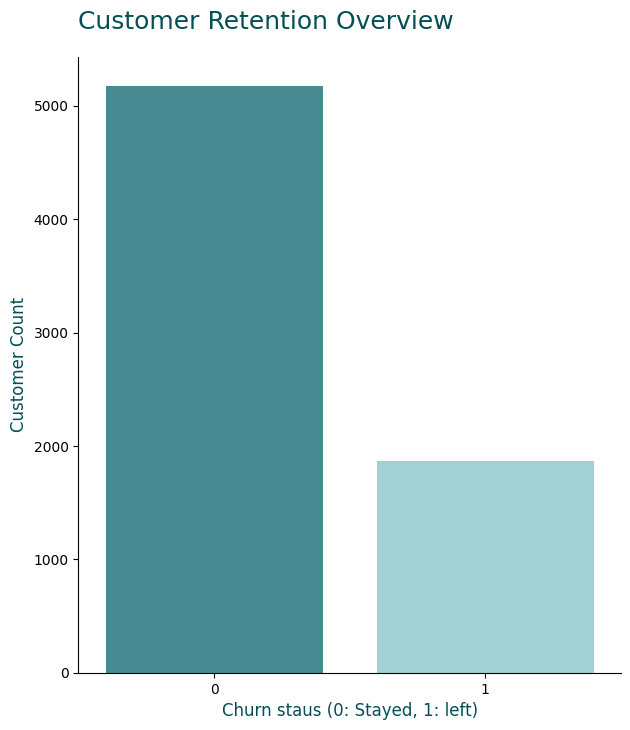

In [28]:
# Chart -1 : CHURN DISTRIBUTION ---

plt.figure(figsize=(7,8))

colors = ["#3c949e", "#9bd8db"]
sns.countplot(x='Churn', data=df_clean, palette=colors)
plt.title('Customer Retention Overview', loc='left', fontsize=18, color='#024f55', pad=20)
plt.xlabel('Churn staus (0: Stayed, 1: left)', fontsize=12, color='#024f55')
plt.ylabel('Customer Count', fontsize=12, color='#024f55')
sns.despine()



plt.show()

<Figure size 1000x700 with 0 Axes>

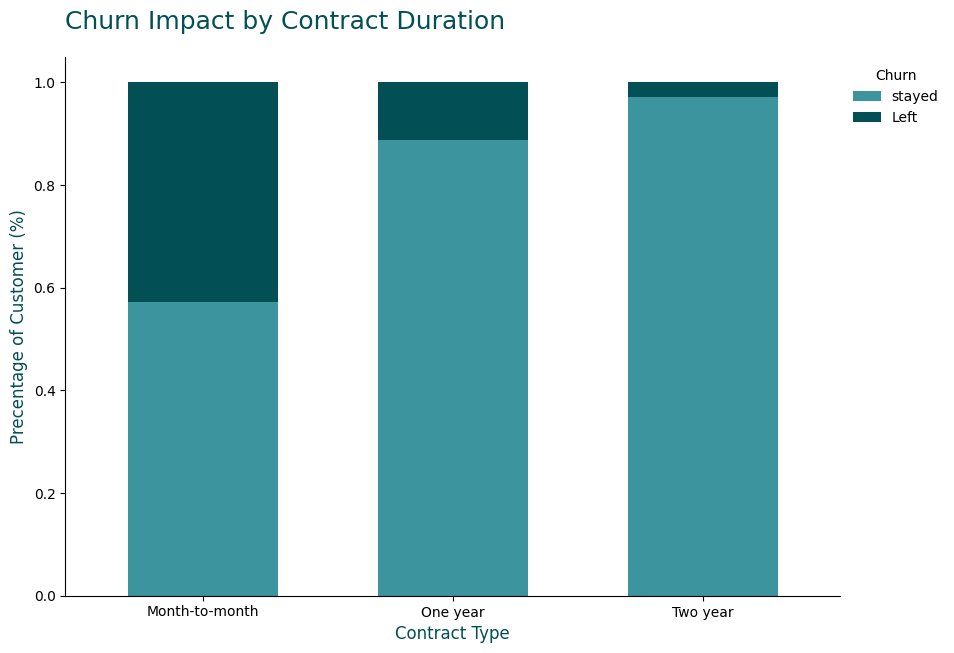

In [29]:
# Chaet -2: CHURN BY CONTRACT TYPE ---

contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn_pct = contract_churn.div(contract_churn.sum(1), axis=0)
plt.figure(figsize=(10,7))
ax = contract_churn_pct.plot(kind='bar', stacked=True,
                              color=["#3c949e", "#024f55"], 
                             figsize=(10, 7), width=0.6)
plt.title('Churn Impact by Contract Duration', loc='left', fontsize=18,color='#024f55', pad=20)
plt.xlabel('Contract Type', fontsize=12,color='#024f55')
plt.ylabel('Precentage of Customer (%)', fontsize=12,color='#024f55')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['stayed', 'Left'], bbox_to_anchor=(1, 1), frameon=False)
sns.despine()
plt.show()

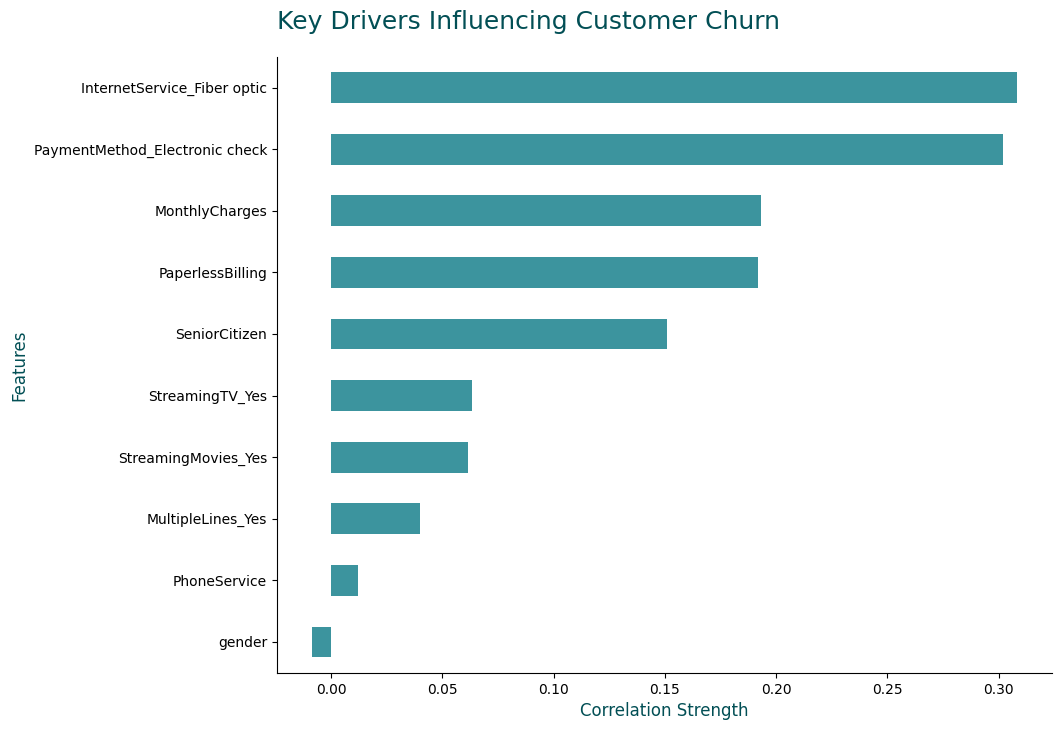

In [30]:
# Chart-3: TOP CHURN DRIVERS ---
plt.figure(figsize=(10, 8))

top_drivers = df_ml.corr()['Churn'].sort_values(ascending=False).head(11).drop('Churn')

# Horizontal bar chart
top_drivers.plot(kind='barh', color="#3c949e")

plt.title('Key Drivers Influencing Customer Churn', loc='left', fontsize=18, color='#024f55', pad=20)
plt.xlabel('Correlation Strength', fontsize=12,color='#024f55')
plt.ylabel('Features', fontsize=12,color='#024f55')
plt.gca().invert_yaxis() 

sns.despine()

plt.show()

Baseline Model Accuracy: 0.8211
------------------------------
Classidication Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



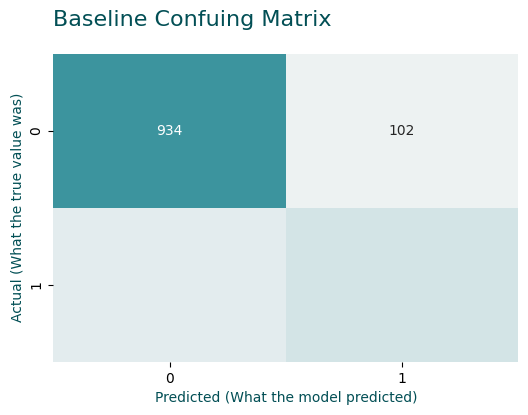

In [31]:
x = df_ml.drop('Churn',axis=1)
y = df_ml['Churn']

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train,y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")
print("-" * 30)
print("Classidication Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap=sns.light_palette("#3c949e", as_cmap=True), cbar=False)

plt.title('Baseline Confuing Matrix', loc='left', fontsize=16, color='#024f55', pad=20)
plt.xlabel('Predicted (What the model predicted)',color='#024f55')
plt.ylabel('Actual (What the true value was)',color='#024f55')
plt.show()

# DEEP LEARNING (ANN) MODEL 

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ANN Architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

print("\n ANN model Training Complete!")

Epoch 1/50


C:\Users\pooja kumari\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7183 - loss: 0.5419 - val_accuracy: 0.8062 - val_loss: 0.4328
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7764 - loss: 0.4625 - val_accuracy: 0.8112 - val_loss: 0.4147
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7790 - loss: 0.4490 - val_accuracy: 0.8148 - val_loss: 0.4088
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4406 - val_accuracy: 0.8126 - val_loss: 0.4035
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7843 - loss: 0.4434 - val_accuracy: 0.8062 - val_loss: 0.4047
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7920 - loss: 0.4346 - val_accuracy: 0.8077 - val_loss: 0.4058
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.4279 - val_accuracy: 0.8084 - val_loss: 0.4030
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7922 - loss: 0.4293 - val_accuracy: 0.8105 - val_

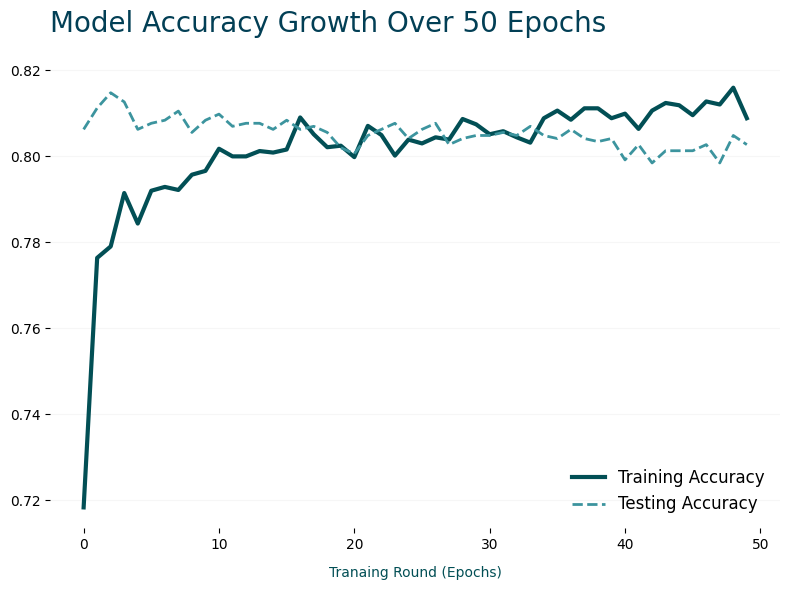

In [33]:
# --- ACCURACY PERFORMANCE ---

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], color="#024f55", linewidth=3, label='Training Accuracy')

plt.plot(history.history['val_accuracy'], color='#3c949e', linestyle='--', linewidth=2, label='Testing Accuracy')

plt.title('Model Accuracy Growth Over 50 Epochs', loc='left', fontsize=20, color='#023f55', pad=25)
plt.xlabel('Tranaing Round (Epochs)', labelpad=10, color='#024f55')
plt.legend(frameon=False, fontsize=12)

plt.grid(axis='y', linestyle='-', alpha=0.1)
sns.despine(left=True, bottom=True) # Borders hatakar Clean look dena

plt.tight_layout()
plt.show()


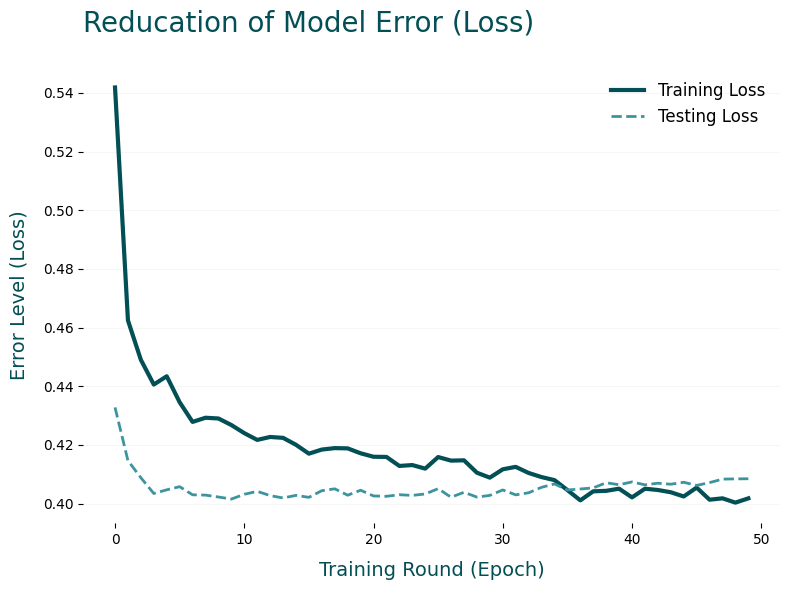

In [34]:
# --- LOSS PERFORMANCE ---
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], color="#024f55", linewidth=3, label='Training Loss')
plt.plot(history.history['val_loss'], color="#3c949e", linestyle='--', linewidth=2, label='Testing Loss')

plt.title('Reducation of Model Error (Loss)', loc='left', fontsize=20, color='#024f55', pad=25)
plt.xlabel('Training Round (Epoch)', fontsize=14, labelpad=10, color='#024f55')
plt.ylabel('Error Level (Loss)',fontsize=14, labelpad=10,color='#024f55')
plt.legend(frameon=False, fontsize=12)

plt.grid(axis='y', linestyle='-', alpha=0.1)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


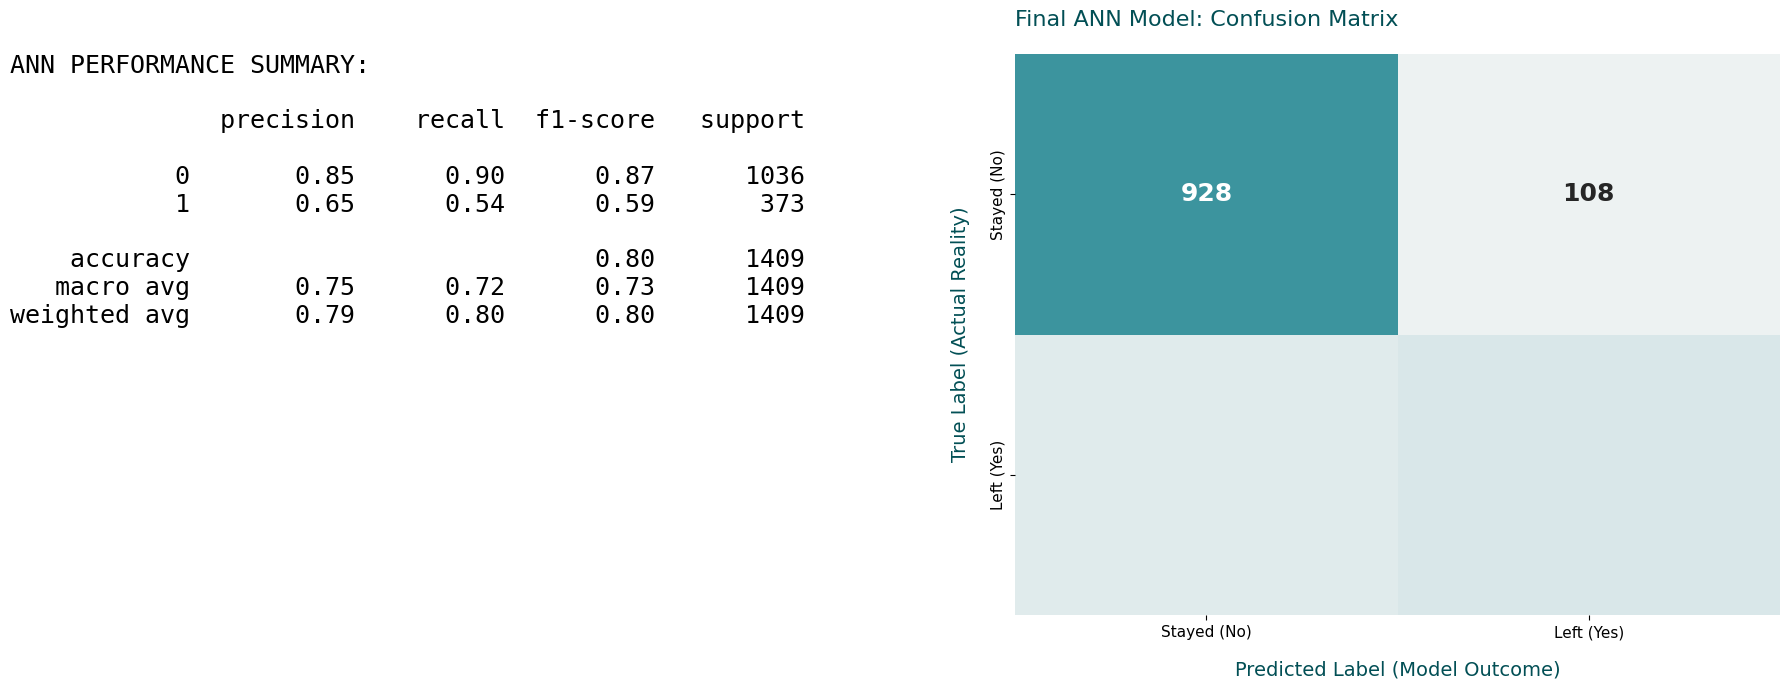

In [35]:
# ---FINAL EVALUATION & CONFUSION MATRIX ---
"""

from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from ANN
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")


# 2. Calculate Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(9,7))
custom_cmap = sns.light_palette("#3c949e", as_cmap=True)

sns.heatmap(cm_ann, annot=True, fmt='d', cmap=custom_cmap, 
            annot_kws={"size": 16, "weight": "bold"}, cbar=False)
plt.title('Final ANN Model: Confusion Matrix', loc='left', fontsize=20, color='#024f55', pad=25)
plt.xlabel('Predicted Label (Model Outcome)', fontsize=14, labelpad=15, color='#024f55')
plt.ylabel('True Label (Actual Reality)', fontsize=14, labelpad=15, color='#024f55')

plt.xticks([0.5, 1.5], ['Stayed (No)', 'left(Yes)'], fontsize=12)
plt.yticks([0.5, 1.5], ['Stayed (No)', 'left(Yes)'], fontsize=12)

plt.show()
print("-" * 30)
print("ANN PERFORMANCE SUMMARY:")
print(classification_report(y_test, y_pred_ann))


"""
# --- FINAL EVALUATION & CONFUSION MATRIX ---
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get predictions from ANN
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# 2. Calculate Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

# 3. Generate Classification Report (TEXT FORMAT)
report_text = classification_report(y_test, y_pred_ann)

# 4. Create Side-by-Side Layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# ---- LEFT SIDE: Text Classification Report ----
ax1.axis('off')  # Hide axis

ax1.text(0, 1,
         "ANN PERFORMANCE SUMMARY:\n\n" + report_text,
         fontsize=18,
         family='monospace',
         verticalalignment='top')

# ---- RIGHT SIDE: Confusion Matrix Heatmap ----
custom_cmap = sns.light_palette("#3c949e", as_cmap=True)

sns.heatmap(cm_ann, annot=True, fmt='d', cmap=custom_cmap,
            annot_kws={"size": 18, "weight": "bold"},
            cbar=False, ax=ax2)

ax2.set_title('Final ANN Model: Confusion Matrix',
              loc='left', fontsize=16, color='#024f55', pad=20)

ax2.set_xlabel('Predicted Label (Model Outcome)', fontsize=14, labelpad=15, color='#024f55')

ax2.set_ylabel('True Label (Actual Reality)', fontsize=14, labelpad=15, color='#024f55')

ax2.set_xticks([0.5, 1.5])
ax2.set_xticklabels(['Stayed (No)', 'Left (Yes)'], fontsize=11)

ax2.set_yticks([0.5, 1.5])
ax2.set_yticklabels(['Stayed (No)', 'Left (Yes)'], fontsize=11)

plt.tight_layout()
plt.show()

In [36]:
# --- PREPARING DATA FOR POWER BI ---
all_predictions = (model.predict(x) > 0.5).astype("int32")
final_powerbi_df = df.copy()

# the prediction column
final_powerbi_df['Churn_Prediction'] = all_predictions

# Save the file to Desktop
full_path = r"C:/Users/pooja kumari/OneDrive/Desktop/PowerBI_Churn_Data.csv"
final_powerbi_df.to_csv(full_path, index=False)

print(f"File successfully saved to Desktop!")
print(f"Location: {full_path}")
print(f"Total Rows Saved: {len(final_powerbi_df)}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
File successfully saved to Desktop!
Location: C:/Users/pooja kumari/OneDrive/Desktop/PowerBI_Churn_Data.csv
Total Rows Saved: 7043
